# Lab | Comparing regression models

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

pd.set_option('display.max_columns', None)

In [2]:
# Load the csv into dataframe

customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Checking the dimensions of data
customer_df.shape

(9134, 24)

In [4]:
# Checking insights of data
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# Checking for nan/null values 
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
# checking data columns
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
# Standardizing column header names
customer_df.columns = [customer_df.columns[i].lower().replace(' ','_') for i in range(len(customer_df.columns))]

In [8]:
#Checking data columns after standardization
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
# converting effective_to_date column from object to datetime format

customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

In [10]:
# Dropping "customer" column because any ID variable is unique and it is not contributing anything to our target column
customer_df=customer_df.drop(["customer"], axis=1)

In [11]:
# Extracting numerical variables

numericals_df = customer_df[customer_df.select_dtypes("number").columns]

In [12]:
numericals_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


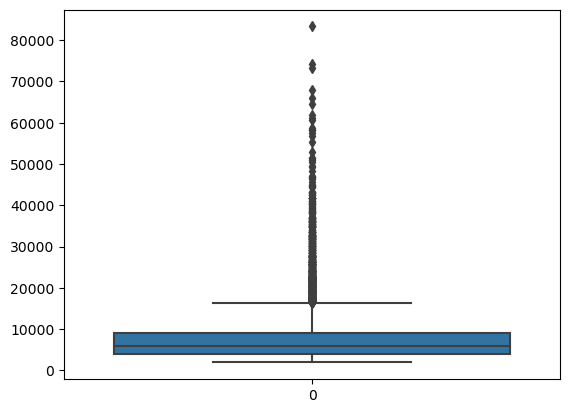

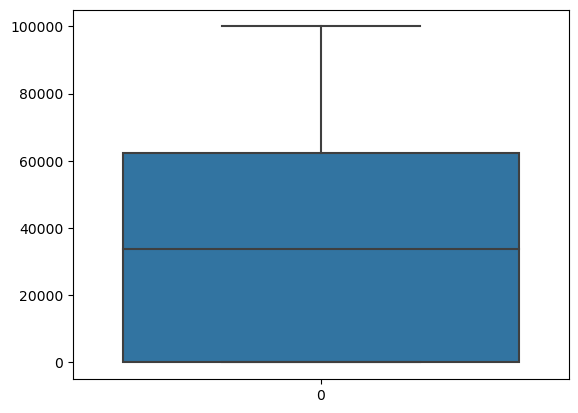

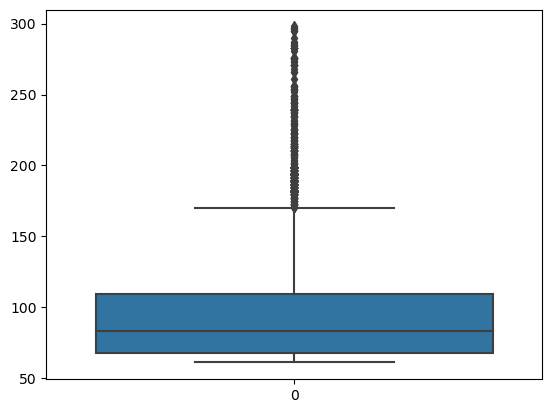

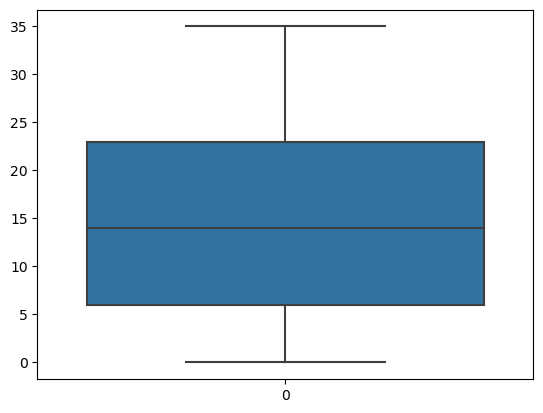

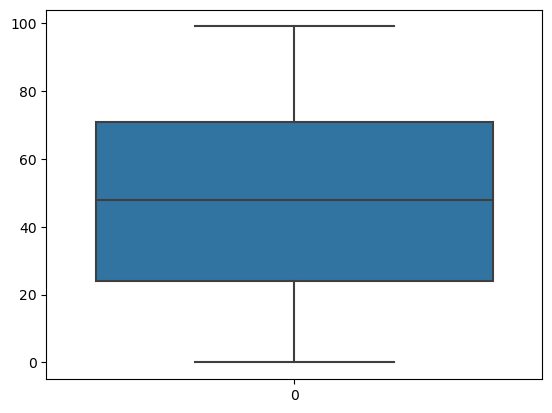

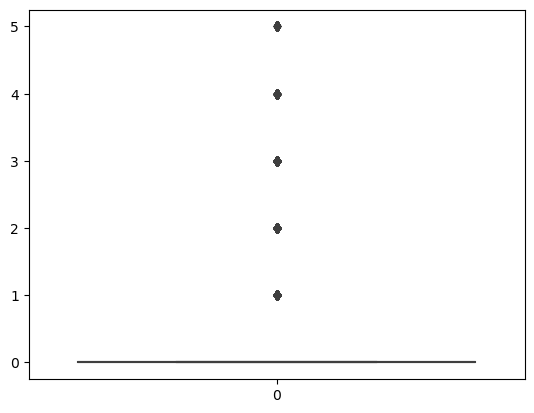

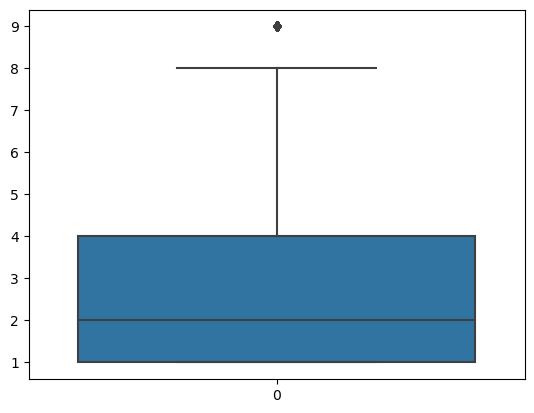

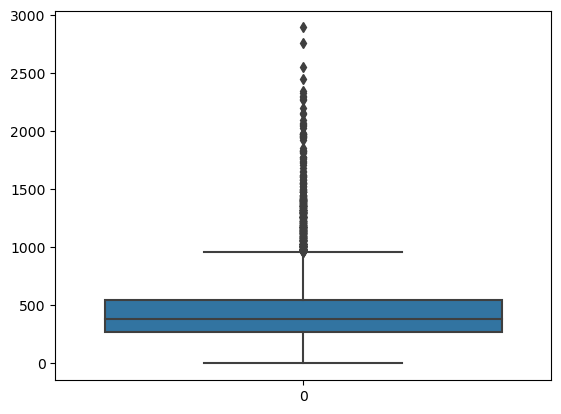

In [13]:
# Checking for outliers in numerical columns
for column in numericals_df.columns:
    sns.boxplot(numericals_df[column])  # takes to see the distribution
    plt.show()

In [14]:
numericals_df.shape

(9134, 8)

In [15]:
# Defing the function to set the upper and lowere limits of IQR
for col in numericals_df.columns:
    # setting limits for columns
    up_lmt = np.percentile(numericals_df[col],75)
    low_lmt = np.percentile(numericals_df[col],25)
    iqr = up_lmt - low_lmt

    # setting new limits for columns
    up_lmt_1 = up_lmt + 1.5*iqr
    low_lmt_1 = low_lmt - 1.5*iqr
    iqr_new = up_lmt_1 - low_lmt_1
    
    exclusion = len(numericals_df.loc[(numericals_df[column]>up_lmt_1) | (numericals_df[column]<low_lmt_1)])
    
    print("\n\x1b[1;31m"+ col +'\x1b[0m')
    print('Old Upper limit: ',up_lmt," | New Upper limit: ",up_lmt_1,
          '\nOld Lower limit: ',low_lmt," | New Lower limit: ",low_lmt_1,
          '\nOld IQR: ',iqr," | New IQR: ",iqr_new,"\nNumber of exclusions are: ",exclusion)
   


customer_lifetime_value
Old Upper limit:  8962.16704125  | New Upper limit:  16414.039911750002 
Old Lower limit:  3994.25179425  | New Lower limit:  -3457.6210762500014 
Old IQR:  4967.915247000001  | New IQR:  19871.660988000003 
Number of exclusions are:  0

income
Old Upper limit:  62320.0  | New Upper limit:  155800.0 
Old Lower limit:  0.0  | New Lower limit:  -93480.0 
Old IQR:  62320.0  | New IQR:  249280.0 
Number of exclusions are:  0

monthly_premium_auto
Old Upper limit:  109.0  | New Upper limit:  170.5 
Old Lower limit:  68.0  | New Lower limit:  6.5 
Old IQR:  41.0  | New IQR:  164.0 
Number of exclusions are:  7691

months_since_last_claim
Old Upper limit:  23.0  | New Upper limit:  48.5 
Old Lower limit:  6.0  | New Lower limit:  -19.5 
Old IQR:  17.0  | New IQR:  68.0 
Number of exclusions are:  8722

months_since_policy_inception
Old Upper limit:  71.0  | New Upper limit:  141.5 
Old Lower limit:  24.0  | New Lower limit:  -46.5 
Old IQR:  47.0  | New IQR:  188.0 
N

In [16]:
# Function to remove outliers 

def remove_outliers(numericals):
    for i in numericals.columns:
        Q1 = numericals[i].quantile(0.25)
        Q3 = numericals[i].quantile(0.75)
        IQR = Q3 - Q1
    
        numericals = numericals[~((numericals[i] < (Q1 - 1.5 * IQR)) | (numericals[i] > (Q3 + 1.5 * IQR)))]

    return numericals

In [17]:
# Applying remove outlier function to the nemerical df

numericals_df=remove_outliers(numericals_df)

In [18]:
# Checking the dimensions of data after removing outliers
numericals_df.shape

(5888, 8)

In [19]:
# Extracting categorical variables

categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [20]:
# Creating copy of original dataFrame
customer_df2 = customer_df.copy()

# Creating copy of numerical dataFrame
numericals1 = numericals_df.copy()

# Creating copy of categorical dataFrame for One hot encoding
cat_one = categoricals[['state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class']].copy()

# Creating copy of categorical dataFrame for Ordinal encoding
cat_ordinal= categoricals[['coverage','employmentstatus','location_code','vehicle_size']].copy()

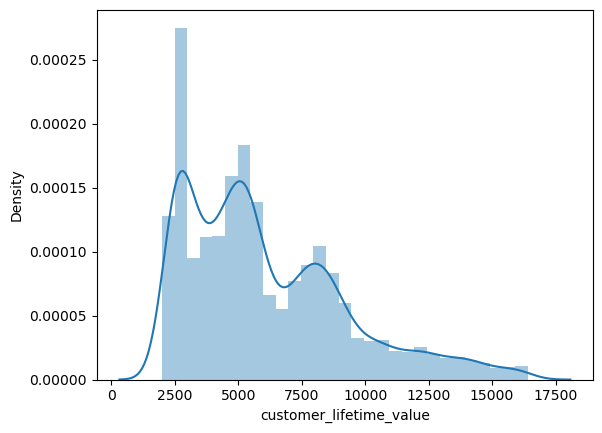

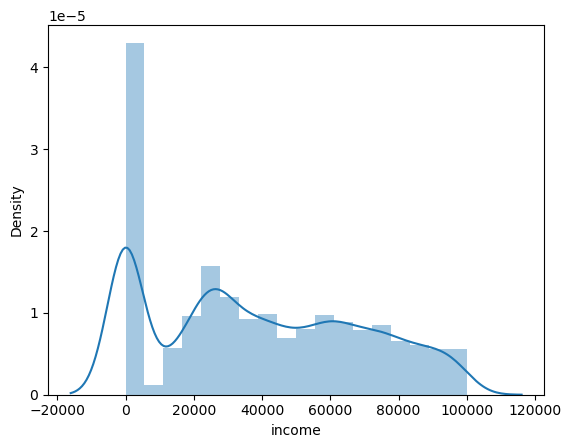

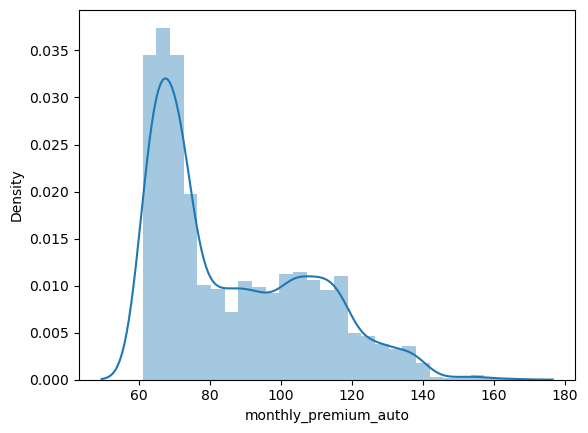

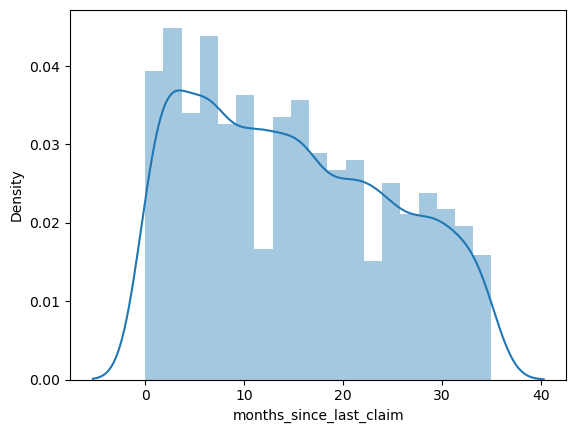

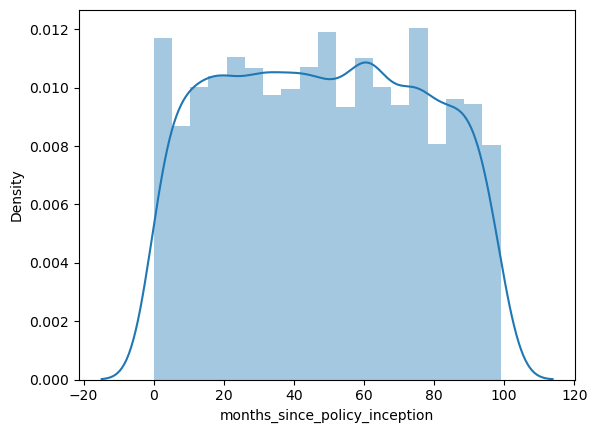

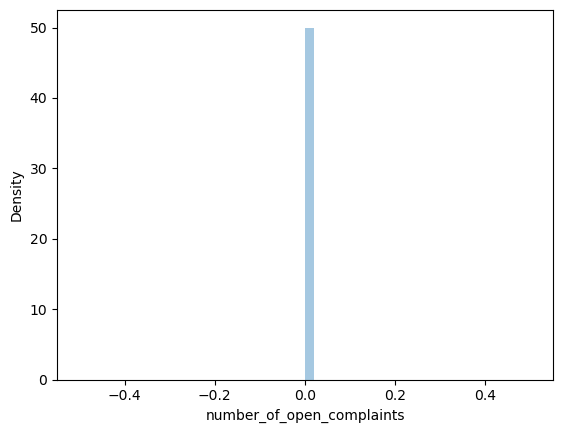

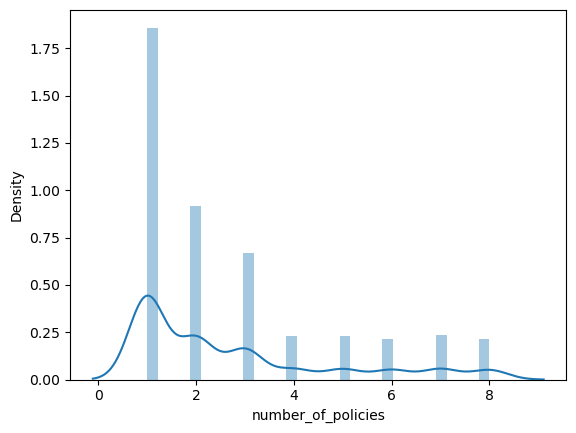

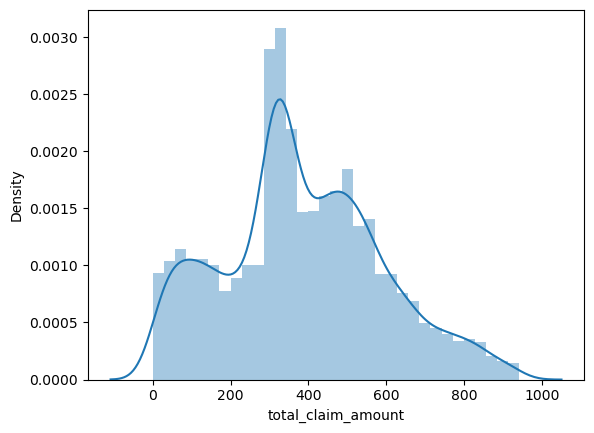

In [21]:
# Checking the distribution of numerical columns before normalization

for column in numericals1.columns:
    sns.distplot(numericals1[column])
    plt.show()

***MinMax Scalar***

In [22]:
# Applaying MinMax scalar to normalize the continous variables
    
scaler = MinMaxScaler().fit(numericals1) 
scaler = scaler.transform(numericals1) 
numericals1 = pd.DataFrame(scaler,columns=numericals1.columns)

In [23]:
numericals1.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.053337,0.562847,0.076923,0.914286,0.050505,0.0,0.000000,0.408565
1,0.755758,0.487763,0.451923,0.514286,0.383838,0.0,0.142857,0.601489
2,0.392086,0.000000,0.432692,0.514286,0.656566,0.0,0.857143,0.562629
3,0.056818,0.438443,0.115385,0.342857,0.444444,0.0,0.000000,0.146590
4,0.434439,0.629140,0.076923,0.400000,0.949495,0.0,0.142857,0.169160


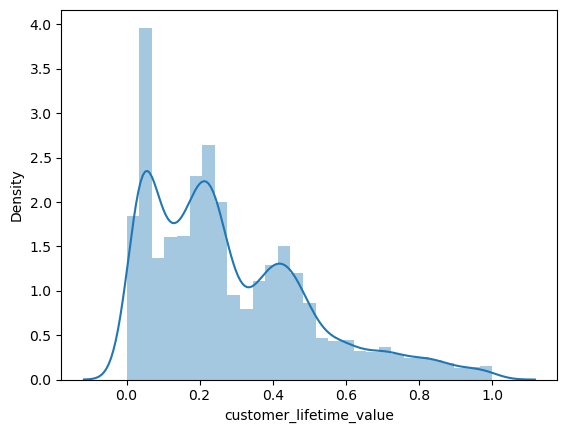

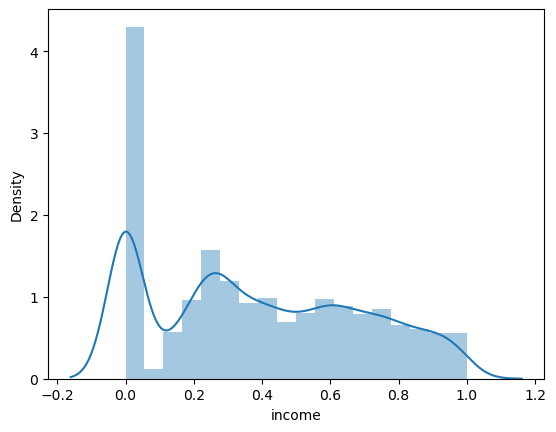

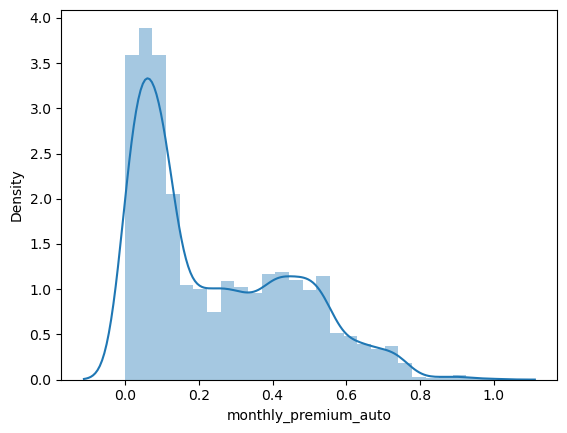

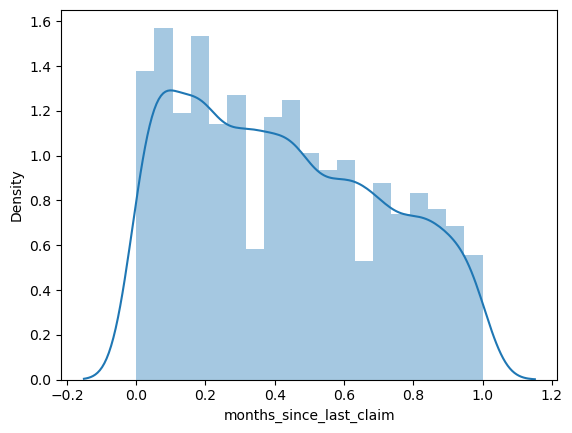

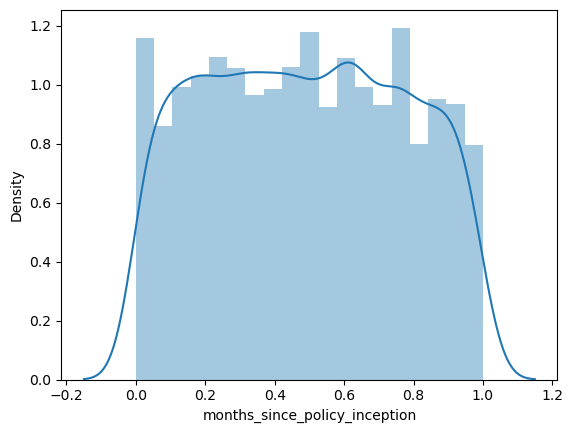

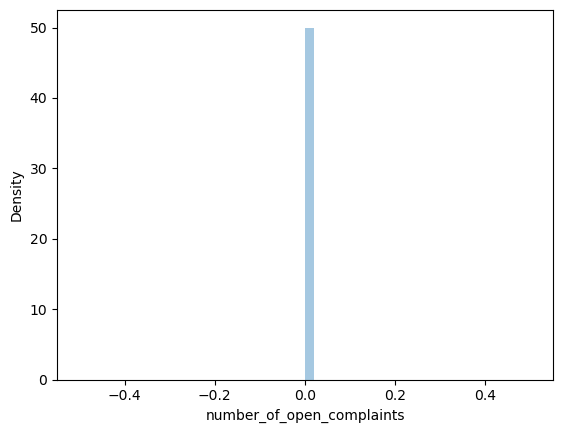

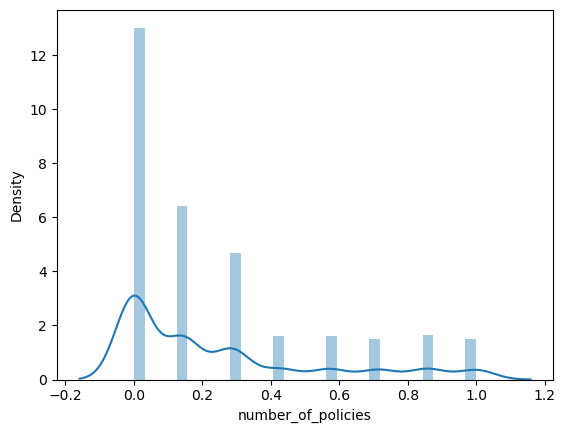

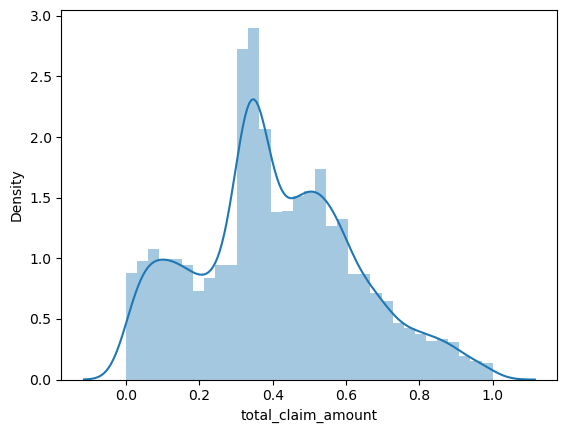

In [24]:
# Checking the distribution of numerical columns after normalization
for column in numericals1.columns:
    sns.distplot(numericals1[column])
    plt.show()

***OneHotEncoder***

In [25]:
cat_one.columns

Index(['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class'],
      dtype='object')

In [26]:
cat_one.shape

(9134, 7)

In [27]:
#Applying label encoder to cat_one dataframe
encoder = LabelEncoder()
for i in cat_one:
    encoder.fit(cat_one[i])
    cat_one[i] = encoder.transform(cat_one[i])

In [28]:
cat_one.head()

,state,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,4,1,0,2,0,0,5
1,0,2,1,5,2,0,0
2,2,1,1,5,0,0,5
3,1,1,0,1,0,2,3
4,4,2,1,3,0,0,0


***OrdinalEncoding***

In [29]:
cat_ordinal.columns

Index(['coverage', 'employmentstatus', 'location_code', 'vehicle_size'], dtype='object')

In [30]:
cat_ordinal["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [31]:
cat_ordinal["coverage"] = cat_ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [32]:
cat_ordinal["employmentstatus"].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [33]:
cat_ordinal["employmentstatus"] = cat_ordinal["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2,
                                                                          'Disabled': 3,'Retired': 4})

In [34]:
cat_ordinal["location_code"].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [35]:
cat_ordinal["location_code"] = cat_ordinal["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [36]:
cat_ordinal["vehicle_size"].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [37]:
cat_ordinal["vehicle_size"] = cat_ordinal["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [38]:
cat_ordinal.head()

,coverage,employmentstatus,location_code,vehicle_size
0,0,0,0,0
1,1,1,0,0
2,2,0,0,0
3,0,1,0,0
4,0,0,1,0


In [39]:
# concatinating the both the categorical dataframes into one

cat = pd.concat([cat_one, cat_ordinal],axis=1)

In [40]:
cat.head()

,state,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,coverage,employmentstatus,location_code,vehicle_size
0,4,1,0,2,0,0,5,0,0,0,0
1,0,2,1,5,2,0,0,1,1,0,0
2,2,1,1,5,0,0,5,2,0,0,0
3,1,1,0,1,0,2,3,0,1,0,0
4,4,2,1,3,0,0,0,0,0,1,0


In [41]:
# converting 'effective_to_date' column values to day,week,month and year columns

customer_df2['day'] = pd.DatetimeIndex(customer_df2['effective_to_date']).day
customer_df2['week_of_year'] = pd.DatetimeIndex(customer_df2['effective_to_date']).week
customer_df2['month'] = pd.DatetimeIndex(customer_df2['effective_to_date']).month
customer_df2['year'] = pd.DatetimeIndex(customer_df2['effective_to_date']).year

In [42]:
date = customer_df2[['day','week_of_year','month','year']]
date

,day,week_of_year,month,year
0,24,8,2,2011
1,31,5,1,2011
2,19,7,2,2011
3,20,3,1,2011
4,3,5,2,2011
...,...,...,...,...
9129,10,6,2,2011
9130,12,6,2,2011
9131,6,5,2,2011
9132,3,5,2,2011


In [43]:
# Concatinating categorical and numerical data frames
customer_df3 = pd.concat([cat, numericals1,date],axis=1)

In [44]:
customer_df3.head()

,state,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,coverage,employmentstatus,location_code,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,week_of_year,month,year
0,4,1,0,2,0,0,5,0,0,0,0,0.053337,0.562847,0.076923,0.914286,0.050505,0.0,0.000000,0.408565,24,8,2,2011
1,0,2,1,5,2,0,0,1,1,0,0,0.755758,0.487763,0.451923,0.514286,0.383838,0.0,0.142857,0.601489,31,5,1,2011
2,2,1,1,5,0,0,5,2,0,0,0,0.392086,0.000000,0.432692,0.514286,0.656566,0.0,0.857143,0.562629,19,7,2,2011
3,1,1,0,1,0,2,3,0,1,0,0,0.056818,0.438443,0.115385,0.342857,0.444444,0.0,0.000000,0.146590,20,3,1,2011
4,4,2,1,3,0,0,0,0,0,1,0,0.434439,0.629140,0.076923,0.400000,0.949495,0.0,0.142857,0.169160,3,5,2,2011


In [45]:
customer_df3.shape

(9134, 23)

In [46]:
customer_df3.isna().sum()

state                               0
marital_status                      0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
vehicle_class                       0
coverage                            0
employmentstatus                    0
location_code                       0
vehicle_size                        0
customer_lifetime_value          3246
income                           3246
monthly_premium_auto             3246
months_since_last_claim          3246
months_since_policy_inception    3246
number_of_open_complaints        3246
number_of_policies               3246
total_claim_amount               3246
day                                 0
week_of_year                        0
month                               0
year                                0
dtype: int64

In [47]:
# Using KNNImputer to fill in missing values in a dataset

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
customer_df3 = pd.DataFrame(imputer.fit_transform(customer_df3),columns = customer_df3.columns)

In [48]:
customer_df3.isna().sum()

state                            0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
coverage                         0
employmentstatus                 0
location_code                    0
vehicle_size                     0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
day                              0
week_of_year                     0
month                            0
year                             0
dtype: int64

### 1.In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [49]:
# Defining X and Y variables

X = customer_df3.drop('total_claim_amount', axis=1)
y = customer_df3['total_claim_amount']

In [50]:
# splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.Try a simple linear regression with all the data to see whether we are getting good results.

In [51]:
lm = LinearRegression() 
lm.fit(X,y)

LinearRegression()

In [52]:
# MOdel validation

predictions  = lm.predict(X_test)
predictions

array([0.33078455, 0.2129502 , 0.43677256, ..., 0.4683071 , 0.52440621,
       0.47741976])

In [53]:
y_test.head()

708     0.313108
47      0.005666
3995    0.519850
1513    0.136861
3686    0.451626
Name: total_claim_amount, dtype: float64

In [54]:
# # evaluating sklearn's LR model

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.3237280118493784
RMSE =  0.15115832572925114
MSE =  0.02284883943727039


<Axes: xlabel='total_claim_amount'>

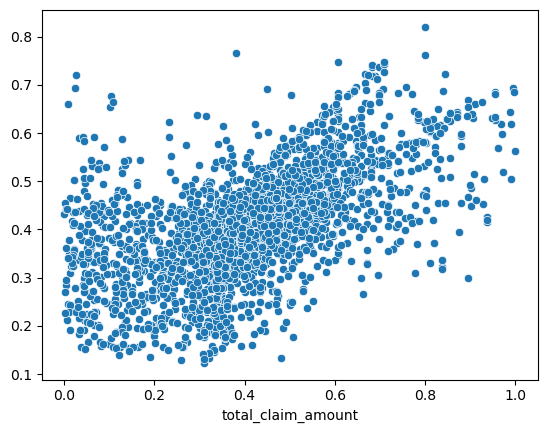

In [55]:
# Plotting the actual and predicted values

sns.scatterplot(x = y_test, y = predictions)

### 3.Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [56]:
model_list = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

def models(X, y,models=[]):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        rmse = mean_squared_error(y_test, predictions, squared=False)
        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        
        print("\n", model)
        print("The R2 score of the model is: ", round(r2,2))
        print("The root mean squared error of the model is: ", round(rmse,2))
        print("The mean squared error of the model is: ", round(mse,2))
        print("The mean absolute error of the model is: " , round(mae,2))

In [57]:
models(X,y,model_list)


 LinearRegression()
The R2 score of the model is:  0.32
The root mean squared error of the model is:  0.15
The mean squared error of the model is:  0.02
The mean absolute error of the model is:  0.11

 KNeighborsRegressor()
The R2 score of the model is:  0.02
The root mean squared error of the model is:  0.18
The mean squared error of the model is:  0.03
The mean absolute error of the model is:  0.13

 MLPRegressor()
The R2 score of the model is:  0.28
The root mean squared error of the model is:  0.16
The mean squared error of the model is:  0.02
The mean absolute error of the model is:  0.12


**Conclusion :**
KNN works better than Linear Regerssion and MLP Regressor. 